Pertama-tama, karena menggunakan dataset kaggle, maka harus mengupload kaggle.json berisi username akun kaggle. Untuk keamanan data tersebut, dapat menggunakan chmod 600

---

In [ ]:
from google.colab import files
!pip install -q kaggle
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Masuk kedalam direktori yang kita kehendaki untuk mendownload dataset tersebut

---


In [ ]:
import os

os.chdir("/content/drive/MyDrive/recomendation")

Mendownload dataset yang diinginkan dan melakukan unzip data tersebut

---

In [ ]:
!kaggle datasets download -d danielgrijalvas/movies --unzip

  0% 0.00/424k [00:00<?, ?B/s]
100% 424k/424k [00:00<00:00, 57.3MB/s]


Melakukan import library yang dibutuhkan dan melakukan load data csv yang telah di download

---

In [1]:
import pandas as pd
data_movies=pd.read_csv('/content/drive/MyDrive/recomendation/movies.csv')

Mengetahui tipe data dalam data frame

In [2]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Mengetahui keadaan deskripitif data

In [3]:
data_movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Mengecek isi data 2 teratas

---

In [4]:
data_movies.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


Melakukan drop column yang tidak dibutuhkan

---

In [5]:
data_movies.drop(
    labels = ['year','released','votes','budget','gross','runtime'],
    axis=1,
    inplace=True
)

Menginisiasi data kedalam variable baru untuk mengantisipasi apabila ada kesalahan

---

In [6]:
df_cad = data_movies
df_cad

,name,rating,genre,score,director,writer,star,country,company
0,The Shining,R,Drama,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures
...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,NaN
7664,Dream Round,NaN,Comedy,4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment
7665,Saving Mbango,NaN,Drama,5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions
7666,It's Just Us,NaN,Drama,NaN,James Randall,James Randall,Christina Roz,United States,NaN


Mengecek apakah terdapat null values di dalam dataframe

---

In [7]:
df_cad.isnull().sum()

name         0
rating      77
genre        0
score        3
director     0
writer       3
star         1
country      3
company     17
dtype: int64

Menghilangkan missing data pada dataframe

---

In [8]:
df_cad.dropna()

,name,rating,genre,score,director,writer,star,country,company
0,The Shining,R,Drama,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures
...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,6.8,Hu Guan,Hu Guan,Zhi-zhong Huang,China,Beijing Diqi Yinxiang Entertainment
7653,The Quarry,R,Crime,5.4,Scott Teems,Scott Teems,Shea Whigham,United States,Prowess Pictures
7656,Tulsa,PG-13,Comedy,5.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,Pryor Entertainment
7658,Black Wall Street Burning,R,Drama,6.6,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,Notis Studio


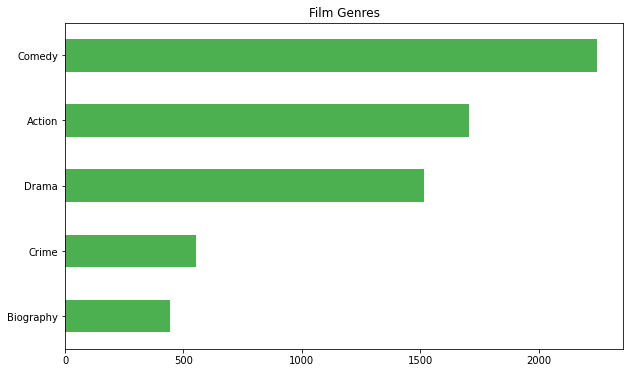

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
title = "Film Genres"
count = df_cad["genre"].value_counts()
count = count.sort_values().tail(5)
percent = 100*df_cad["genre"].value_counts(normalize=True)
count.plot(kind='barh', title=title, figsize=(10,6), color = "#4CAF50");

Melakukan inisiasi TfidfVectorizer() <br> Teknik ini digunakan untuk menemukan representasi dari nama genre film yang ada pada dataframe

---

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(df_cad['genre']) 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'fi',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci',
 'sport',
 'thriller',
 'western']

Tahapan ini dilakukan untuk mentransformasi data nama genres yang ada menjadi matrix

---

In [11]:
tfidf_matrix = tf.fit_transform(df_cad['genre']) 

tfidf_matrix.shape 

(7668, 20)

Setelah mendapatkan bentuk matrix dari tahapan di atas, kemudian untuk menghasilkan vector dari tdidf menggunakan method todense()

---

In [12]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Membuat data frame untuk melihat isi matrix tfidf dengan nama genre dengan nama film

---

In [13]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_cad.name
).sample(22, axis=1,replace=True).sample(10, axis=0,replace=True)

,family,musical,musical,musical,history,music,sport,action,comedy,horror,...,horror,horror,thriller,fi,fi,animation,adventure,thriller,action,biography
name,,,,,,,,,,,,,,,,,,,,,
Stepfather II: Make Room for Daddy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extraordinary Measures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Reckless,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Weeks Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Devdas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crossroads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Monuments Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Captain Fantastic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Love & Other Drugs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung derajat kesamaan (similarity degree) antar games dengan teknik cosine similarity.

---

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_cad['name'], columns=df_cad['name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (7668, 7668)


name,Sisters,Men of Honor,Hulk,Son of Saul,Bobby
name,,,,,
Let's Go to Prison,1.0,0.0,0.0,0.0,0.0
It's My Turn,1.0,0.0,0.0,0.0,0.0
For Your Eyes Only,0.0,0.0,1.0,0.0,0.0
Chasing the Dragon II: Wild Wild Bunch,0.0,0.0,1.0,0.0,0.0
The Thief and the Cobbler,0.0,0.0,0.0,0.0,0.0
Sleepy Hollow,0.0,0.0,0.0,0.0,0.0
First Family,1.0,0.0,0.0,0.0,0.0
The Love Punch,1.0,0.0,0.0,0.0,0.0
Playing by Heart,1.0,0.0,0.0,0.0,0.0


Membuat method untuk memberikan rekomendasi berdasarkan nama film

---

In [16]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=df_cad[['name', 'genre','score','company']], k=5):
   
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Menampilkan hasil rekomendasi berdasarkan content based filter

---

In [17]:
genre_recomendation = movie_recommendations('The Blue Lagoon')
genre_recomendation

,name,genre,score,company
0,Shanghai Surprise,Adventure,3.2,HandMade Films
1,Dunston Checks In,Adventure,5.4,Joe Wizan/Todd Black
2,Stand by Me,Adventure,8.1,Columbia Pictures
3,Robin Hood: Men in Tights,Adventure,6.7,Brooksfilms
4,Black Beauty,Adventure,6.6,Warner Bros.


Membuat dataframe baru untuk menampung data dengan nama The Blue Lagoon

---

In [18]:
genre_cad = df_cad[df_cad['name'] == 'The Blue Lagoon']

Menampung nama genre rekomendasi yang dikeluarkan program

---

In [19]:
get_feature_genre=[]
for i in range(len(genre_cad.genre)):
    for x in genre_cad.genre.str.split(','):
        if x not in get_feature_genre:
            get_feature_genre.append(x)

Menghitung hasil presisi dari nama genre yang dikeluarkan oleh model

---

In [20]:
for i in get_feature_genre[0]:
  print(i + ": " + str((
      (genre_recomendation['genre'].str.contains(i).count()/genre_recomendation['genre'].count())*100)
  ))

Adventure: 100.0
